In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, [8,11]].values
y = dataset.iloc[:, -1].values

In [13]:
dataset.head()

,Kode Kecamatan,Kecamatan,Kode Kelurahan,Kelurahan,Tidak/Belum Sekolah,Belum Tamat SD,Tamat SD,SLTP,SLTA,D1 dan D2,D3,S1,S2,S3
0,32.73.01,Sukasari,32.73.01.1001,Sukarasa,2275,1173,1900,1648,3735,108,469,1633,288,43
1,32.73.01,Sukasari,32.73.01.1002,Gegerkalong,3850,2038,2068,2450,6924,348,1280,3662,640,115
2,32.73.01,Sukasari,32.73.01.1003,Isola,2412,1289,1740,1608,4073,120,502,1557,205,60
3,32.73.01,Sukasari,32.73.01.1004,Sarijadi,4525,2462,2137,2545,8416,380,1703,4503,633,84
4,32.73.02,Coblong,32.73.02.1001,Cipaganti,1820,1055,1121,1406,4494,58,399,1200,103,25


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

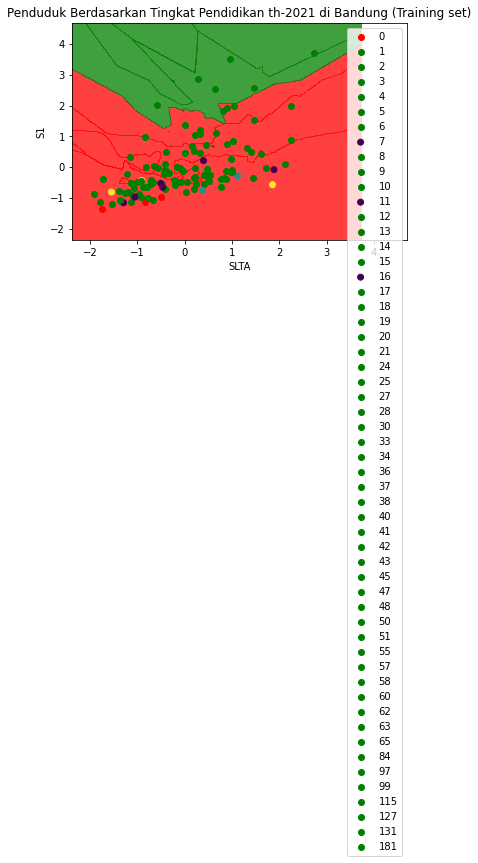

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np. arange(start= X_set[:, 0]. min() - 1, stop= X_set[:, 0].max() + 1, step= 0.01),
                    np. arange(start= X_set[:, 1]. min() - 1, stop= X_set[:, 1].max() + 1, step= 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Penduduk Berdasarkan Tingkat Pendidikan th-2021 di Bandung (Training set)')
plt.xlabel('SLTA')
plt.ylabel('S1')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

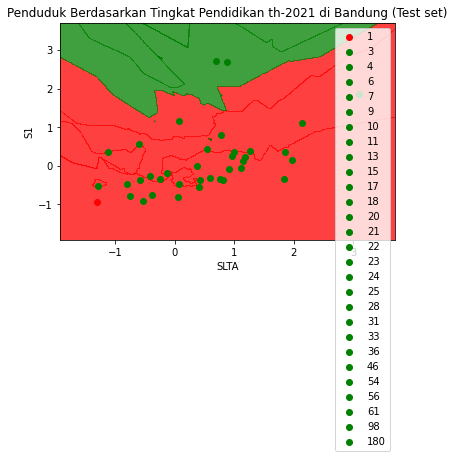

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np. arange(start= X_set[:, 0]. min() - 1, stop= X_set[:, 0].max() + 1, step= 0.01),
                    np. arange(start= X_set[:, 1]. min() - 1, stop= X_set[:, 1].max() + 1, step= 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Penduduk Berdasarkan Tingkat Pendidikan th-2021 di Bandung (Test set)')
plt.xlabel('SLTA')
plt.ylabel('S1')
plt.legend()
plt.show()